# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Quick bag drop at First Win...
1,✅ Trip Verified | 4 Hours before takeoff we r...
2,✅ Trip Verified | I recently had a delay on B...
3,"Not Verified | Boarded on time, but it took a..."
4,"✅ Trip Verified | 5 days before the flight, w..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [5]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
from textblob import TextBlob, Word

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['trip', 'verified']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
#data cleaning
import re
import string
def clean_text(text, custom = custom_stopwords):
  text = text.lower()
  text = text.replace('[^\w\s]', '')
  text = text.replace('\w*\d\w*', '')
  text = ' '.join([word for word in text.split() if word not in stop_words])
  text = ' '.join([word for word in text.split() if word not in custom])
  text = ' '.join([Word(word).lemmatize() for word in text.split()])
  return text

cleaning = lambda x : clean_text(x)

In [10]:
clean_df = df['reviews'].apply(cleaning)

In [11]:
clean_df = pd.DataFrame(clean_df)

In [12]:
clean_df.head()

,reviews
0,✅ | quick bag drop first wing many passenger u...
1,✅ | 4 hour takeoff received mail stating crypt...
2,✅ | recently delay british airway bru lhr due ...
3,"| boarded time, took age get runway due conges..."
4,"✅ | 5 day flight, advised ba cancelled asked u..."


In [13]:
clean_df['polarity'] = clean_df['reviews'].apply(lambda x : TextBlob(x).sentiment[0])
clean_df['subjectivity'] = clean_df['reviews'].apply(lambda x : TextBlob(x).sentiment[1])
clean_df.head()

,reviews,polarity,subjectivity
0,✅ | quick bag drop first wing many passenger u...,0.420000,0.582778
1,✅ | 4 hour takeoff received mail stating crypt...,-0.031667,0.309444
2,✅ | recently delay british airway bru lhr due ...,0.006944,0.367130
3,"| boarded time, took age get runway due conges...",0.140833,0.377500
4,"✅ | 5 day flight, advised ba cancelled asked u...",0.119722,0.578254


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

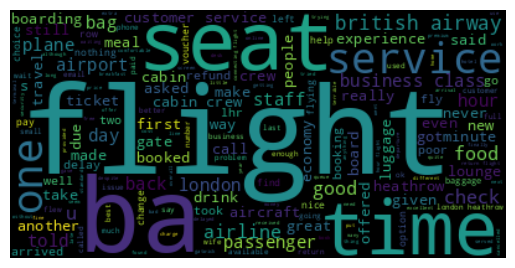

In [15]:
word_cloud = WordCloud().generate(' '.join(clean_df['reviews']))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
len(clean_df)

1000

(array([  1.,   4.,   7.,  40., 108., 369., 281., 147.,  34.,   9.]),
 array([-1.  , -0.82, -0.64, -0.46, -0.28, -0.1 ,  0.08,  0.26,  0.44,
         0.62,  0.8 ]),
 <BarContainer object of 10 artists>)

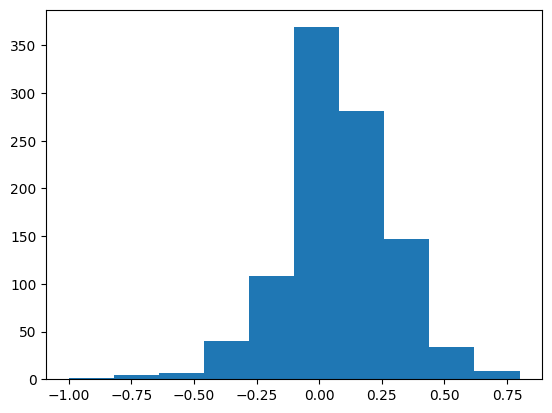

In [16]:
plt.hist(clean_df['polarity'])

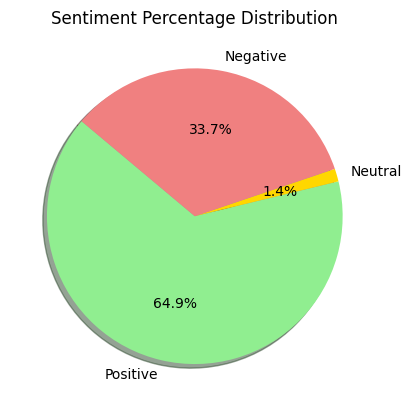

In [19]:
positive_percentage = (sum(1 for sentiment in clean_df['polarity'] if sentiment > 0) / len(clean_df)) * 100
negative_percentage = (sum(1 for sentiment in clean_df['polarity'] if sentiment < 0) / len(clean_df)) * 100
neutral_percentage = (sum(1 for sentiment in clean_df['polarity'] if sentiment == 0) / len(clean_df)) * 100

colors = ['lightgreen', 'gold', 'lightcoral']
#explode = (0.1, 0, 0)
sizes = [positive_percentage, neutral_percentage, negative_percentage]
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Percentage Distribution')

plt.show()